In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [2]:
# Use pandas_reader to read some data from the Yahoo Finance into a DataFrame variable
# retrieve Adjusted Close data for the ‘AAPL’ stock in Y2020
df = pdr.get_data_yahoo(['AAPL'],'2020')['Adj Close']

In [3]:
pd.concat([df.head(), df.tail()])

Symbols,AAPL
Date,
2020-01-02,298.829956
2020-01-03,295.924713
2020-01-06,298.282715
2020-01-07,296.879883
2020-01-08,301.655548
2020-07-13,381.910004
2020-07-14,388.230011
2020-07-15,390.899994
2020-07-16,386.089996


In [4]:
# Add a new column to the DataFrame for the ‘AAPL’ data
# This creates a rolling mean for the previous 21 rows
df['20d mavg'] = df['AAPL'].rolling(window=20).mean()

In [5]:
# The second new column is a rolling standard deviation for the previous 21 rows
df['20d std'] = df['AAPL'].rolling(window=20).std()

In [6]:
# Add another 2 new columns

# Containing values of 2 standard deviations above the “20d mavg”
df['Upper Band'] = df['20d mavg'] + (df['20d std'] * 2)
# Containing values of 2 standard deviations below the “20d mavg”
df['Lower Band'] = df['20d mavg'] - (df['20d std'] * 2)

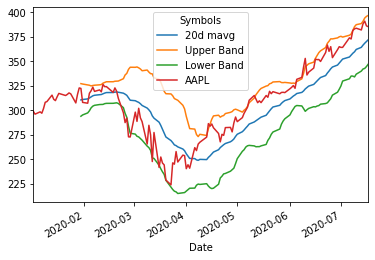

In [7]:
# Plot all columns except for the“ 20d std” column
cols=['20d mavg','Upper Band','Lower Band','AAPL']
df[cols].plot()

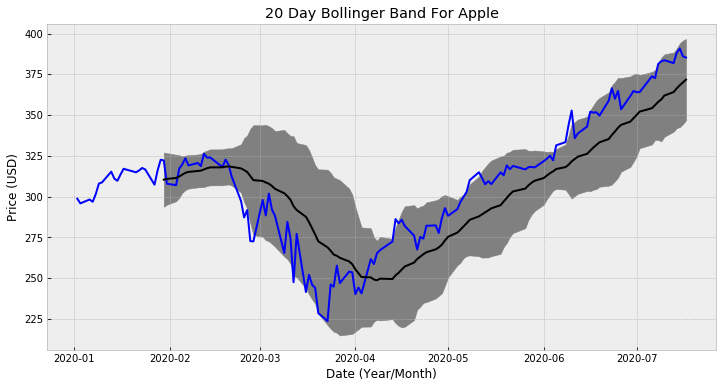

In [8]:
# Set style, empty figure and axes
plt.style.use('bmh')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df.index.get_level_values(0)

# Plot shaded 20Day Bollinger Band
ax.fill_between(x_axis, df['Upper Band'], df['Lower Band'], color='grey')

# Plot the Close values and the 20d moving average
ax.plot(x_axis, df['AAPL'], color='blue', lw=2)
ax.plot(x_axis, df['20d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('20 Day Bollinger Band For Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price (USD)')

plt.show();